# Online shoppers purchasing intention 

### About dataset

### Context
#### Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

# Content

This dataset consists of 10 numerical and 8 categorical attributes.Each record in the database corresponds to one session on a page. Data was collected within one year.

* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
* The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
* The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
* The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 
* The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
* For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year. 
* Revenue determine whether sessions has resulted in purchase or not.

# Problem Statement:
To predict the buying behaviour of a site visitor as this can have many implications such as E-Commerce site able to  recommend products and better target ads or figure out the factors that may lead to increased sales. 

# Objective:
* Understand the Dataset & cleaning (if required).
* Build Random Forest models for prediction and strategy for online purchase of shoppers.    
    

# Action Plan:
1. Data Exploration
2. Data Pre-processing
3. Data Manipulation
4. Model Fitting
5. Project Outcomes & Conclusion    

# 1. Data Exploration

In [65]:
# Importing required libraries for analysis
import numpy as np         # it is used for mathematical calculation
import pandas as pd        # It is used for Data analysis
import os
import matplotlib.pyplot as plt           # used for visualization
from PIL import  Image
%matplotlib inline

import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")

In [66]:
# Importing data
purchase = pd.read_csv(r"C:\Users\prati\Desktop\Python\Data Science\Machine Learning\Projects\Online purchase prediction\online_shoppers_intention.csv")
purchase.head()               # top 5 rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [67]:
purchase.info()     # It gives data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

This dataset contains 18 features in which 7 are float type, 9 are int type and rest 2 are object type

In [68]:
print("Rows And Columns: ",purchase.shape)

Rows And Columns:  (12330, 18)


In [69]:
print(" Variables in the dataset: \n",purchase.columns)        # It gives columns names

 Variables in the dataset: 
 Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [70]:
# Checking number of unique rows in each feature
purchase.nunique().sort_values()        

Revenue                       2
Weekend                       2
VisitorType                   3
SpecialDay                    6
OperatingSystems              8
Region                        9
Month                        10
Browser                      13
Informational                17
TrafficType                  20
Administrative               27
ProductRelated              311
Informational_Duration     1258
BounceRates                1872
PageValues                 2704
Administrative_Duration    3335
ExitRates                  4777
ProductRelated_Duration    9551
dtype: int64

In [71]:
# checking missing values present in a data:
print("Missing values count in each variable: \n", purchase.isnull().sum(), "\n")

# checking percentage of missing values present in each variable
print("Missing values percentage in each variable:")
for column in purchase.columns: #for each column in data
    null = (sum(purchase[column].isnull())/len(purchase[column])) * 100  #calculating % of null values 
    print(column, null) # printing variable name and %of missing values 

Missing values count in each variable: 
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64 

Missing values percentage in each variable:
Administrative 0.0
Administrative_Duration 0.0
Informational 0.0
Informational_Duration 0.0
ProductRelated 0.0
ProductRelated_Duration 0.0
BounceRates 0.0
ExitRates 0.0
PageValues 0.0
SpecialDay 0.0
Month 0.0
OperatingSystems 0.0
Browser 0.0
Region 0.0
TrafficType 0.0
VisitorType 0.0
Weekend 0.0
Revenue 0.0


There are no missing values present in the data

In [72]:
purchase.describe()          # overall summary of data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Here, Statistics of the data is fine, let's do further analysis

# 2. Data Pre-processing

### Exploratory Data Analysis (EDA)

<AxesSubplot:>

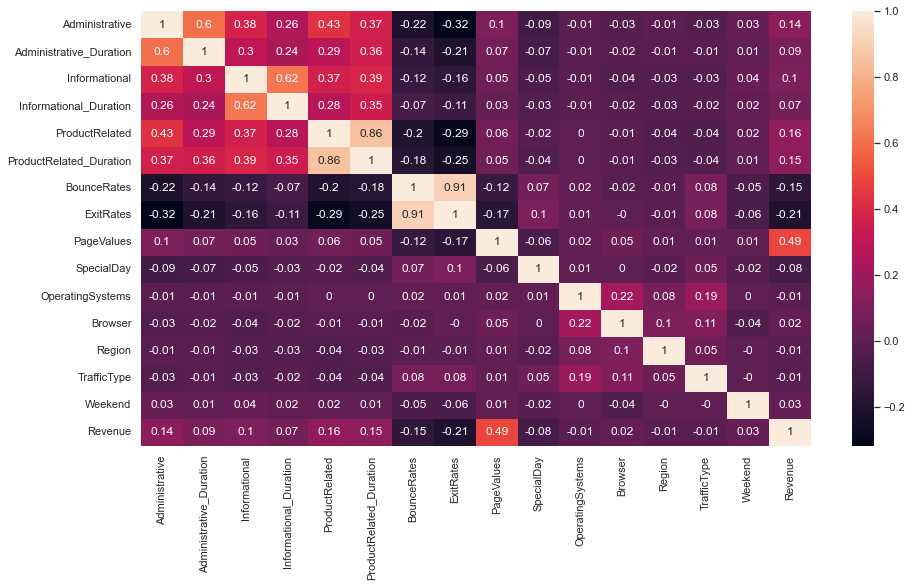

In [73]:
sns.set(rc={'figure.figsize': (15, 8)})
sns.heatmap(purchase.corr().round(decimals=2,), annot=True,)

* Here, There are many attritbutes are not correlated
* Only Pages Values and Revenue are correlated. The reason for their correlation may be the high number of sessions with PageValues = 0 where no purchase was made and the high Revenue percentage for sessions with high PageValues caused by visits to purchase summary pages.
* BounceRates and ExitRates are correlated by the way they are calculated for each page by GoogleAnalytics (when the Bounce Rate increases, the Exit Rate also increases)
* The correlation between the time spent on pages of a given type and their number is obvious.

# Univariate Analysis

<AxesSubplot:xlabel='Revenue', ylabel='count'>

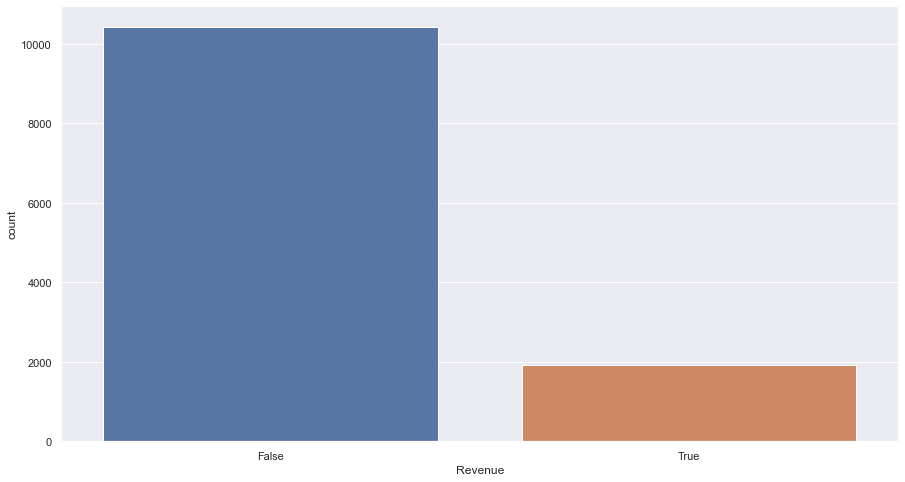

In [74]:
# Target Variable = Revenue
sns.countplot('Revenue',data=purchase)

<AxesSubplot:ylabel='Revenue'>

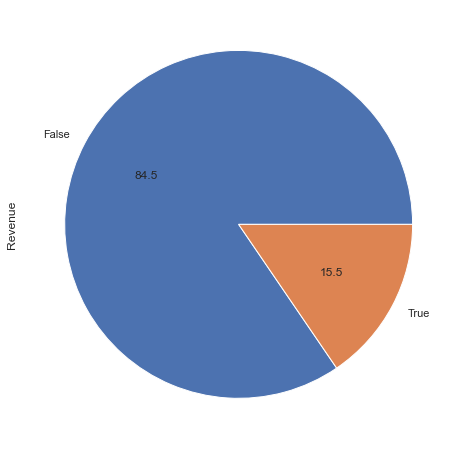

In [75]:
purchase['Revenue'].value_counts().plot(kind='pie', autopct='%.1f')

Only 15.5% revenue generated after visiting to the pages. 84.5% sessions are ended up not buying after visiting website pages.

<AxesSubplot:xlabel='Month', ylabel='count'>

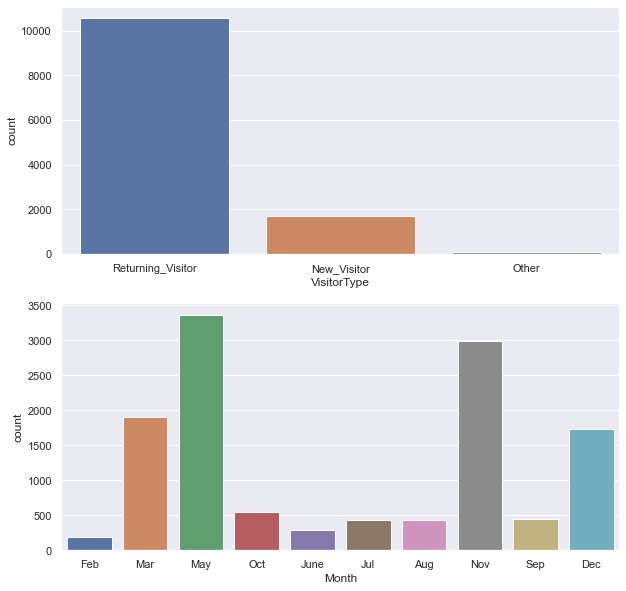

In [76]:
fig,(axis1,axis2) =plt.subplots (2,1, figsize=(10,10))
sns.countplot(x='VisitorType',data=purchase,ax=axis1)
sns.countplot(x='Month',data=purchase, ax=axis2)

* Number of returning visitors are more as compared to new visitor
* More people visiting the online website during month of summer and winter due to offers and discounts due to holidays and festivals.

# Bi-variate Analysis

<AxesSubplot:title={'center':'Monthly Revenue Generated by visiting website '}, xlabel='Month', ylabel='count'>

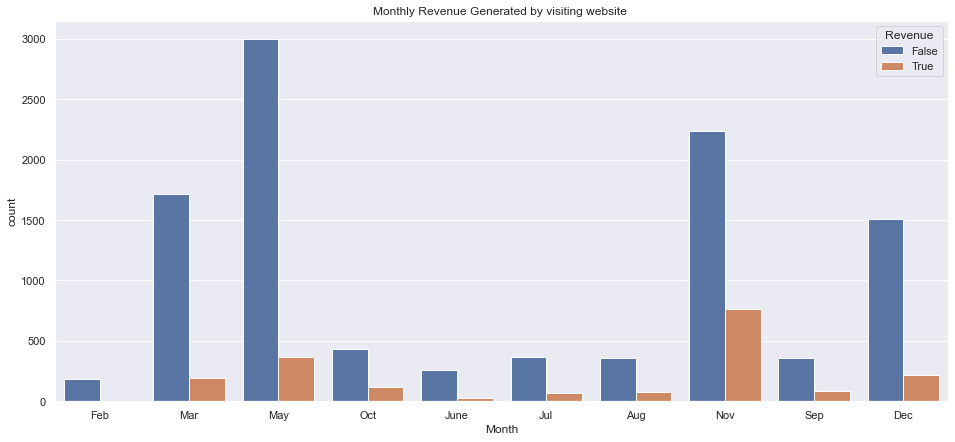

In [77]:
sns.set(rc={'figure.figsize':(16,7)})
plt.title('Monthly Revenue Generated by visiting website ')
sns.countplot(x='Month',hue='Revenue',data=purchase)

* During months of summer and winter around holiday time more number of people visiting the website and maybe making more purchase due to offers and gift cards.
* The most purchases that occurred in November which came out to almost twice as much as the purchases that occurred in May.
* In the month of Feb people don't buy so we have to do something to increase purchase in the month of feb.

<AxesSubplot:xlabel='Informational', ylabel='count'>

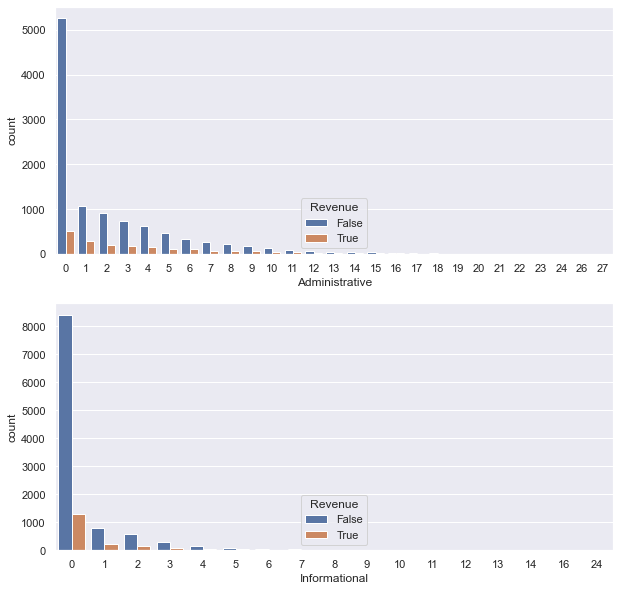

In [78]:
fig,(axis1,axis2) =plt.subplots (2,1, figsize=(10,10))
sns.countplot(x='Administrative',hue='Revenue',data=purchase,ax=axis1)
sns.countplot(x='Informational',hue='Revenue',data=purchase, ax=axis2)

<AxesSubplot:xlabel='ProductRelated', ylabel='Count'>

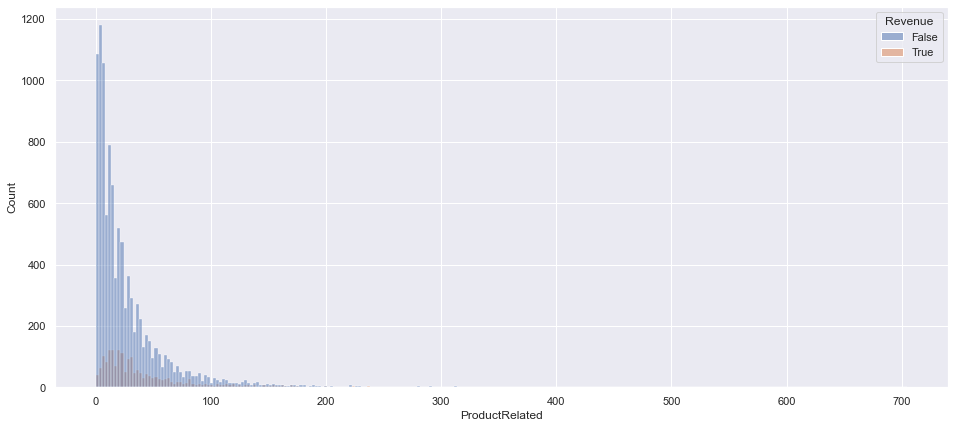

In [79]:
sns.set(rc={'figure.figsize':(16,7)})
sns.histplot(x='ProductRelated',hue='Revenue',data=purchase)

* For all types the number of pages are linearly related to the time spent on them, so we will not include it in the final model.
* The number of Administrative pages visited does not reflect the frequency of purchase (except for not visiting any page, where the probability of purchase is clearly lower).

<AxesSubplot:xlabel='TrafficType'>

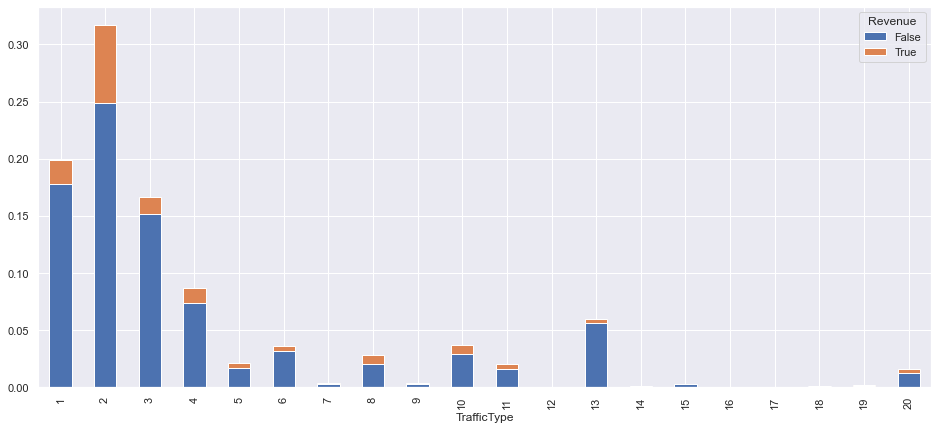

In [80]:
pd.crosstab(purchase["TrafficType"], purchase["Revenue"], normalize=True).plot(kind='bar', stacked=True)

Unfortunately the website that provided the data set does not describe in deeper detail what exactly each traffic type is, we can only assume they correlate with direct forms of traffic, or indirect such as a reference from another page or a Google search.

<AxesSubplot:xlabel='Weekend', ylabel='count'>

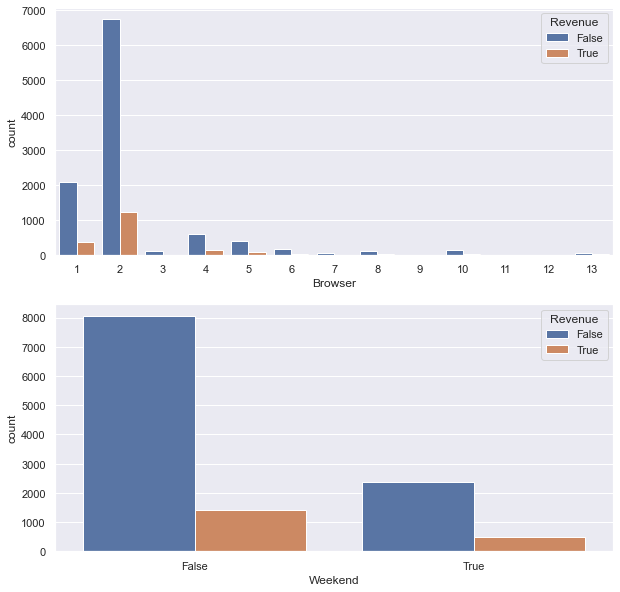

In [81]:
fig,(axis1,axis2) =plt.subplots (2,1, figsize=(10,10))
sns.countplot(x='Browser',hue='Revenue',data=purchase,ax=axis1)
sns.countplot(x='Weekend',hue='Revenue',data=purchase, ax=axis2)

* There is no significant effect of browser on the purchase.
* Shoppers visit and purchase from site mostly on non-weekend days

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

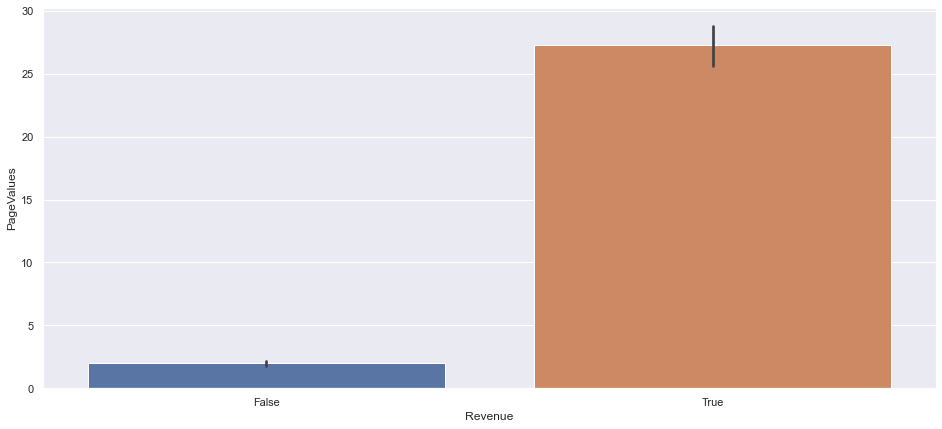

In [82]:
sns.barplot(x='Revenue', y='PageValues', data=purchase)

Page value is an important feature in dataset. As it contains most of the revenue generated Increase in page value, increase in purchase.

<AxesSubplot:>

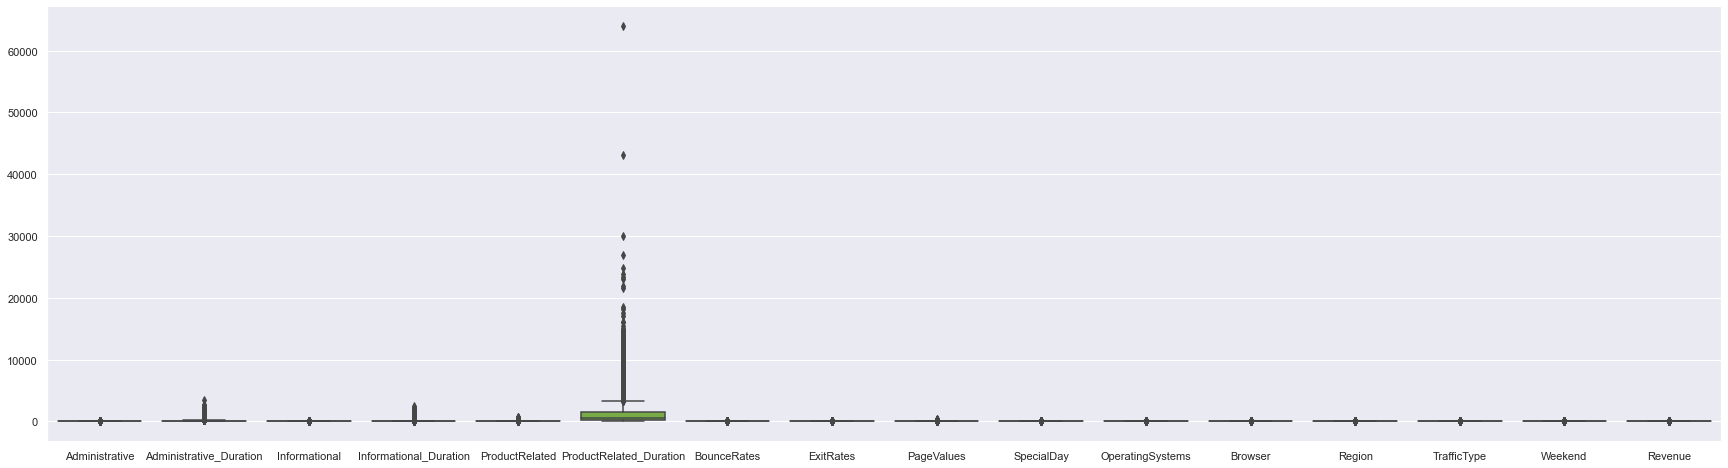

In [83]:
# Checking Outliers in the data
sns.set(rc={'figure.figsize':(30,8)})
sns.boxplot(data= purchase)

There are Outliers present in most of the important features in the dataset, So we need to treat them.

In [84]:
# Converting all categorical variables into numerical variables
purchase.VisitorType = purchase.VisitorType.replace({'Returning_Visitor': '0', 'New_Visitor': '1', 'Other': '2',}).astype(int)
purchase.Weekend = purchase.Weekend.replace({'False': '0', 'True': '1',}).astype(int)
purchase.Revenue = purchase.Revenue.replace({'False': '0', 'True': '1',}).astype(int)
purchase.Month = purchase.Month.replace(
    {'Jan': '1',
    'Feb': '2', 
    'Mar': '3', 
    'Apr': '4',
    'May': '5', 
    'June': '6', 
    'Jul': '7', 
    'Aug': '8', 
    'Sep': '9', 
    'Oct': '10', 
    'Nov': '11', 
    'Dec': '12',
    }).astype(int)

All categorical features converted into numerical for  further analysis

# 3. Data Manipulation

* As here dataset is imbalanced, need to balance by using SMOTE technique.
* Data is splitted into two parts such as train and test for model building and to check its performance.

In [85]:
from sklearn.model_selection import train_test_split

x = purchase.drop(columns='Revenue')
y = purchase['Revenue']

In [86]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30)
x_oversample,y_oversample = sm.fit_resample(x,y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_oversample.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_oversample.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_oversample == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_oversample == 0)))

Before OverSampling, counts of label '1': 1908
Before OverSampling, counts of label '0': 10422 

After OverSampling, the shape of train_X: (20844, 17)
After OverSampling, the shape of train_y: (20844,) 

After OverSampling, counts of label '1': 10422
After OverSampling, counts of label '0': 10422


In [87]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_oversample,y_oversample,test_size=0.30 , random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14590, 17)
(14590,)
(6254, 17)
(6254,)


After applying SMOTE technique, data becomes balanced. We can use this data for further analysis.

In [88]:
# Scaling of data:
# To convert data on same scale where mean = 0 & standard deviation = 1
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

Scaling deals effectively with outliers

# 4. Model Fitting

## Logistic Regression

In [107]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
lr_test = accuracy_score(y_test,pred_test)

In [108]:
lr_test

0.8468180364566678

Accuracy of Logistic regression model is 85%, so we can say that model is good fit.

In [109]:
# Classification report for accuracy of model

from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3123
           1       0.88      0.81      0.84      3131

    accuracy                           0.85      6254
   macro avg       0.85      0.85      0.85      6254
weighted avg       0.85      0.85      0.85      6254



* Accuracy of model is 85%,so we can say that model is good fit.
* Sensitivity of model is 81%
* specificity of model is 88%

# Feature Selection 

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=15, # make 15 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=15)

### Important Feature

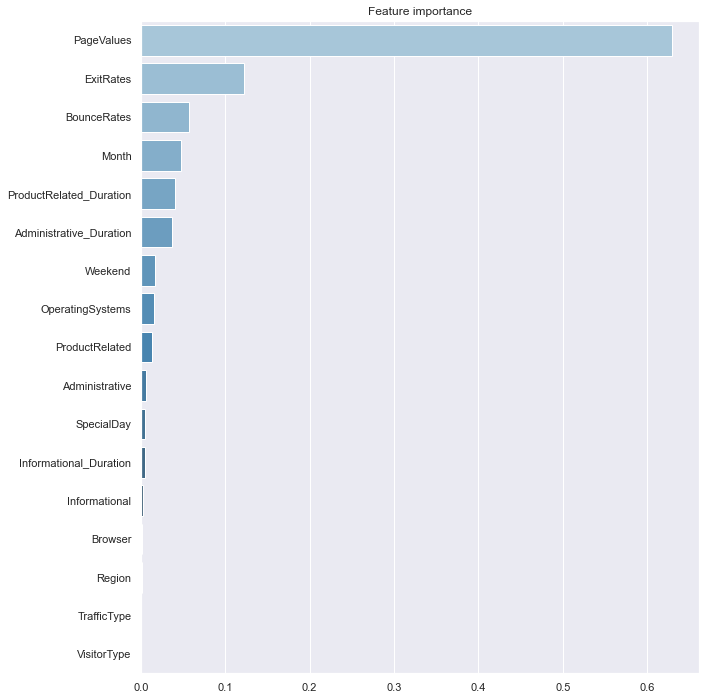

In [111]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')


* Page Values is the most important feature for online shoppers purchase intetion
* Exit rates, Product related duration,Product related and Month are other important features which sholud be considered while making strategy for increase in shoppers purchase rate.

### Random Forest

In [112]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

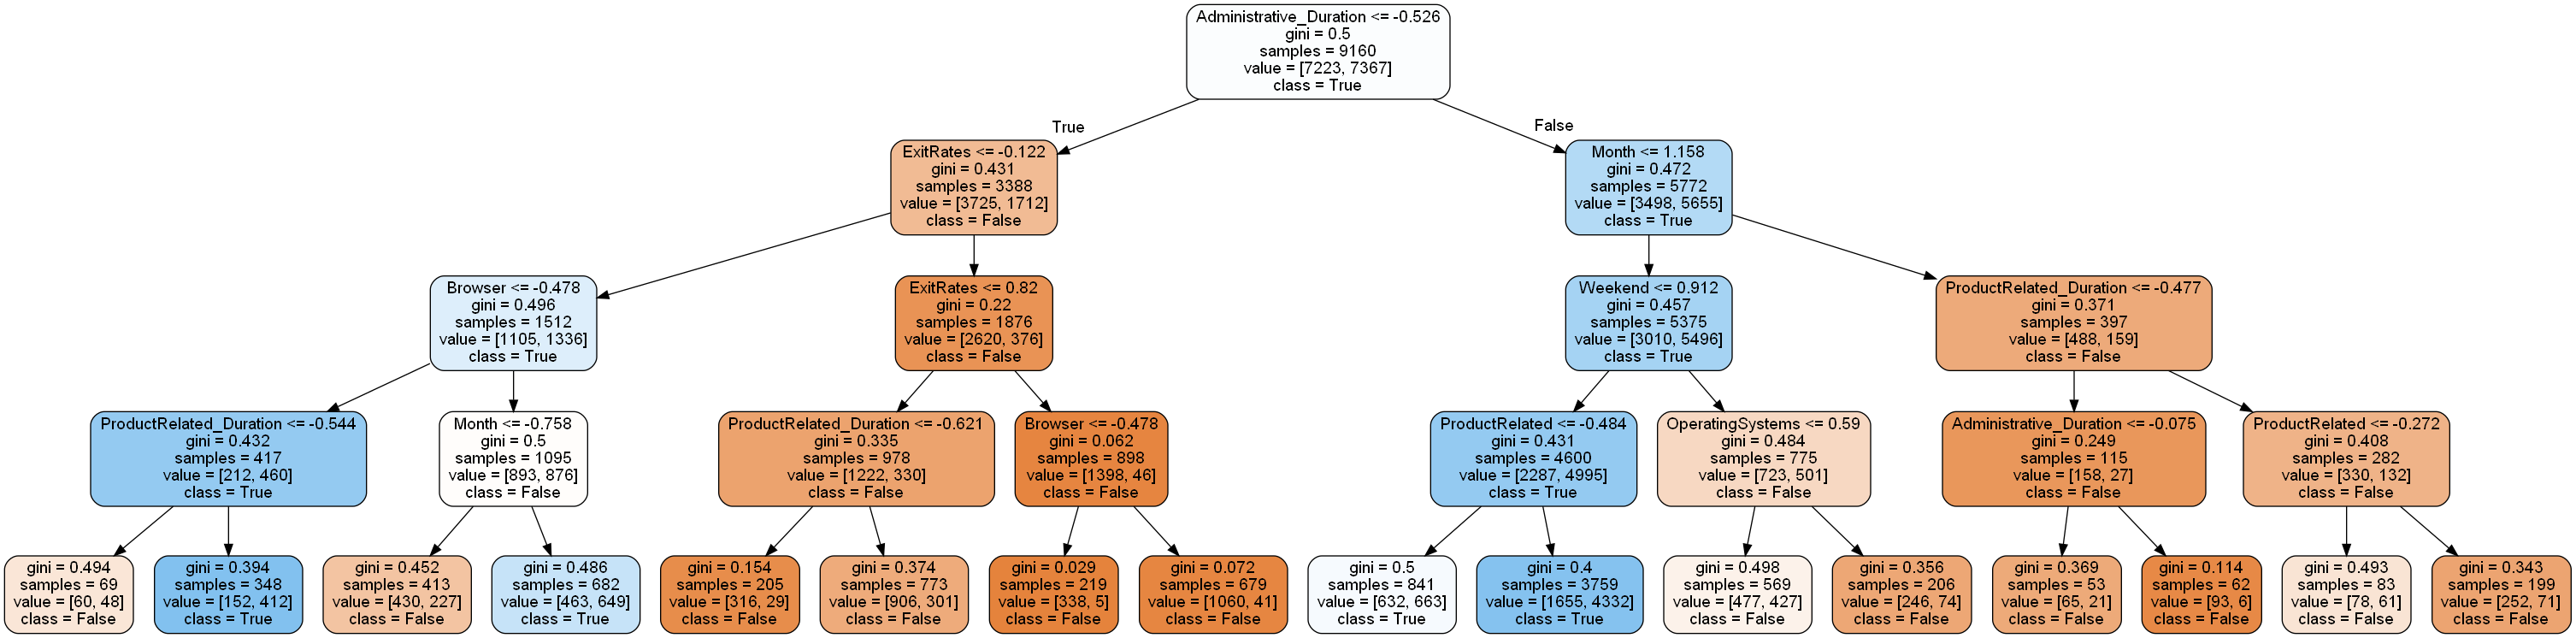

In [113]:
tree = Model.estimators_[5]  # specify the tree number 
purchase=['False','True'] 
# Export the image to a dot file
feature_list = list(x.columns)  # all variable name
export_graphviz(tree, out_file = 'tree.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=purchase,
                rounded = True,   # edges of nodes rounded
                filled=True)   # filled= colour
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

### Precidtions on Train Data

In [114]:
y_train_p =Model.predict(X_train)
y_train_p
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_p )

array([[6474,  825],
       [ 735, 6556]], dtype=int64)

In [115]:
Accuracy_of_Random_Forest = Model.score(X_train,y_train)
Accuracy_of_Random_Forest

0.8930774503084304

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_p))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7299
           1       0.89      0.90      0.89      7291

    accuracy                           0.89     14590
   macro avg       0.89      0.89      0.89     14590
weighted avg       0.89      0.89      0.89     14590



* Accuracy of Random Forest train model is 89%, We can say that model is good fit.
* Sensitivity of model is 90%
* Specificity of mdel is 89%

### Predictions on Test Data

In [117]:
y_predict = Model.predict(X_test)
y_predict
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict )

array([[2758,  365],
       [ 312, 2819]], dtype=int64)

In [118]:
Accuracy_of_Random_Forest = Model.score(X_test,y_test)
Accuracy_of_Random_Forest

0.8917492804605053

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3123
           1       0.89      0.90      0.89      3131

    accuracy                           0.89      6254
   macro avg       0.89      0.89      0.89      6254
weighted avg       0.89      0.89      0.89      6254



* Accuracy of Random Forest test model is 89%, We can say that model is good fit.
* Sensitivity of model is 90%
* Specificity of mdel is 88%

# Extereme Gradient Boosting

In [120]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from xgboost.sklearn import XGBClassifier # Extrame GB

In [121]:
model = XGBClassifier(learning_rate = 0.1, n_estimators=150, min_child_weight=3,  max_depth=13)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=13, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [122]:
y_pred = model.predict(X_test)

In [123]:
accuracy_score(y_test, y_pred)

0.9338023664854493

In [124]:
# Classification report gives accuracy of model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3123
           1       0.92      0.95      0.93      3131

    accuracy                           0.93      6254
   macro avg       0.93      0.93      0.93      6254
weighted avg       0.93      0.93      0.93      6254



* Accuracy of Xg Boost model is 93%, We can say that model is good fit.
* Sensitivity of model is 95%
* Specificity of mdel is 92%

Text(0.5, 0, 'Logistic Regression , Random Forest  ')

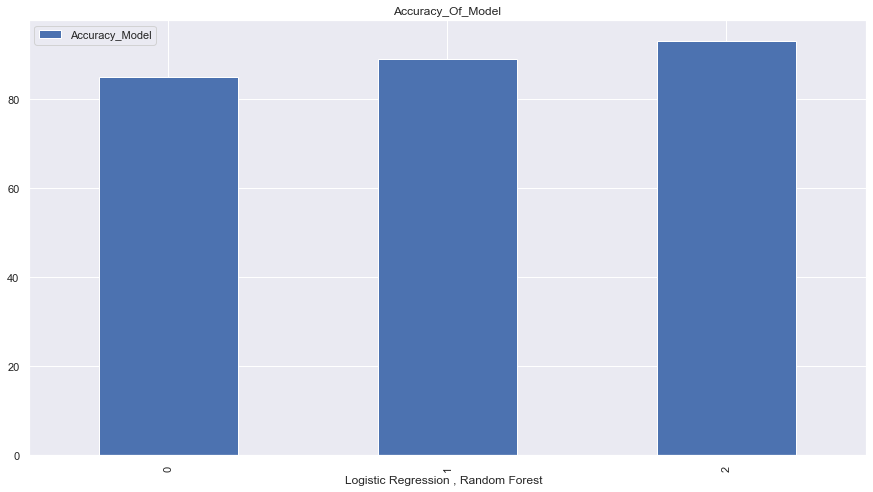

In [126]:
# Selecting Best Model:
# Comparison of models:
Comparison_of_Model = pd.DataFrame({'Model':['Logistic_Regression','Random_forest','Extreme Gradient Boosting'],
                      'Accuracy_Model':[85,89,93]})

Comparison_of_Model

Comparison_of_Model.plot(kind="bar",figsize=(15, 8))

plt.title("Accuracy_Of_Model")

plt.xlabel("Logistic Regression , Random Forest  ")

* Extreme Gradient Boosting gives more accuracy as 93%, than Random forest and Logistic regression.
* Hence, Extreme Gradient Boosting is a best suitable model for Predicting behaviour and purchase of online shoppers.

# Conclusion:

* Companies should focus on improving mobility between pages.
* Companies should provide sales and deals during certain months such as May and November which having greater frequency in purchases.
* Possible data points that could be used to increase sales are user buying history, third party data, wish lists, etc. 

# Completed